In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/3561a457-ec26-442a-925a-cdbe7f37a430___RS_HL 5786.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/76c0783e-5e1a-4a25-8371-9e7ef2a8c9d7___RS_HL 7465.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/45c79d4a-ac12-4bf8-a4d6-f59898aa4570___RS_HL 6317.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/686f612d-bb49-409a-8afa-0707481774fe___RS_HL 8184.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/ca4458ac-56ef-41f3-b7a9-6084846069fd___RS_HL 6072.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/20102c8b-dde0-47d2-8035-7ceeb42f1961___RS_HL 6207.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/041482f6-6dd6-4ac9-9e59-e973c9bcaf6d___RS_HL 8155.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/94b7e2c6-9081-4546-b411-c89c0dd219e7___RS_HL 7416.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/

In [2]:
apple_train ='/kaggle/input/apple-disease-dataset/apple_disease/apple' 
apple_test = '/kaggle/input/apple-disease-dataset/apple_disease/apple_test'

In [4]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
from PIL import Image
import seaborn as sns
import random
import pandas as pd


In [5]:
#import the images using image generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set image size and batch size
IMG_SIZE = (150, 150)  # Resize all images to 150x150 pixels
BATCH_SIZE = 32  # Number of images per batch

# Apply data augmentation to training images
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Rescale test images (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    apple_train,  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"  # Multi-class classification
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    apple_test,  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"  
)
 

Found 2286 images belonging to 4 classes.
Found 316 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


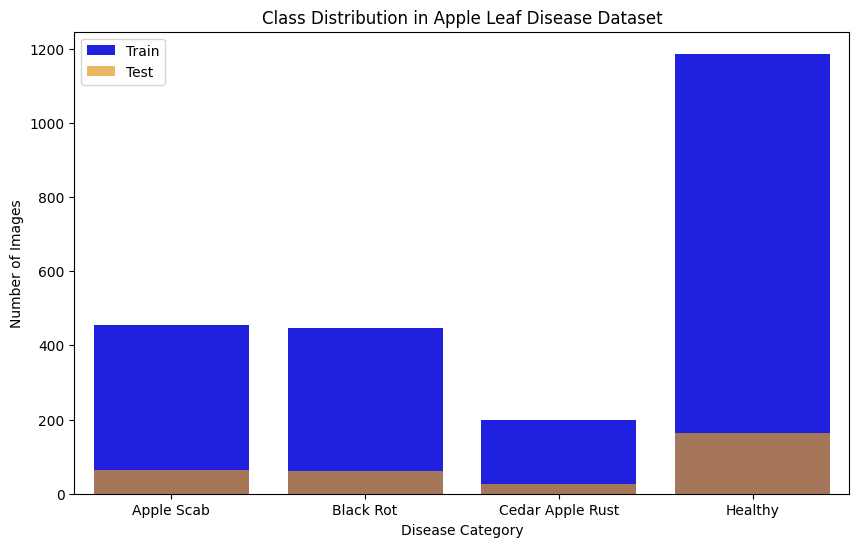

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class labels and their image counts
classes = ["Apple Scab", "Black Rot", "Cedar Apple Rust", "Healthy"]
train_counts = [454, 448, 199, 1186]
test_counts = [63, 62, 27, 164]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=train_counts, color="blue", label="Train")
sns.barplot(x=classes, y=test_counts, color="orange", label="Test", alpha=0.7)

plt.title("Class Distribution in Apple Leaf Disease Dataset")
plt.xlabel("Disease Category")
plt.ylabel("Number of Images")
plt.legend()
plt.show()


In [ ]:
#!pip install --upgrade scikit-image


In [ ]:
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern # Change 'greycomatrix' to 'graycomatrix' and 'greycoprops' to 'graycoprops'
print("✅ Skimage features imported successfully!")

✅ Skimage features imported successfully!


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern  # Updated import


# Define categories
categories = ["apple scab", "black rot", "cedar apple rust", "healthy"]

# GLCM properties
GLCM_PROPS = ['contrast', 'correlation', 'energy', 'homogeneity']

# LBP parameters
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Function to extract GLCM features
def extract_glcm_features(gray_img):
    # Use graycomatrix instead of greycomatrix
    glcm = graycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    # Use graycoprops instead of greycoprops
    return [graycoprops(glcm, prop).flatten()[0] for prop in GLCM_PROPS]

# Function to extract LBP features
def extract_lbp_features(gray_img):
    lbp = local_binary_pattern(gray_img, LBP_POINTS, LBP_RADIUS, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=10, range=(0, 10))  # 10-bin histogram
    return hist.astype("float") / (hist.sum() + 1e-6)  # Normalize

# Function to extract color statistics
def extract_color_features(image):
    (mean_r, mean_g, mean_b), (std_r, std_g, std_b) = cv2.meanStdDev(image)
    return [mean_r[0], mean_g[0], mean_b[0], std_r[0], std_g[0], std_b[0]]

# Process images and extract features
data = []
labels = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        image = cv2.imread(img_path)

        if image is None:
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Extract features
        glcm_features = extract_glcm_features(gray)
        lbp_features = extract_lbp_features(gray)
        color_features = extract_color_features(image)

        # Combine all features using np.concatenate
        feature_vector = np.concatenate([glcm_features, lbp_features, color_features])
        data.append(feature_vector)
        labels.append(category)

# Create DataFrame
columns = GLCM_PROPS + [f'LBP_{i}' for i in range(10)] + ['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B']
df = pd.DataFrame(data, columns=columns)
df['Class'] = labels  # Add class labels

# Save to CSV
df.to_csv("apple_leaf_features.csv", index=False)

print("✅ Feature extraction complete! Features saved as 'apple_leaf_features.csv'.")
print(df.head())

✅ Feature extraction complete! Features saved as 'apple_leaf_features.csv'.
      contrast  correlation    energy  homogeneity     LBP_0     LBP_1  \
0  1086.652528     0.759556  0.009875     0.073667  0.135895  0.110901   
1    88.178661     0.914813  0.031722     0.312436  0.050446  0.099564   
2  1074.354687     0.812851  0.011420     0.086591  0.135773  0.107986   
3   456.794776     0.803180  0.013159     0.103362  0.119995  0.112305   
4   192.473928     0.924632  0.016593     0.171942  0.086365  0.111313   

      LBP_2     LBP_3     LBP_4     LBP_5  ...     LBP_7     LBP_8     LBP_9  \
0  0.049210  0.048859  0.047043  0.054565  ...  0.112274  0.157074  0.230499   
1  0.054657  0.105026  0.141113  0.128632  ...  0.099548  0.096085  0.135300   
2  0.048950  0.048843  0.046295  0.058258  ...  0.109985  0.161224  0.228333   
3  0.056137  0.061340  0.063293  0.066742  ...  0.107086  0.136383  0.212067   
4  0.061722  0.078583  0.099655  0.090378  ...  0.108871  0.114532  0.175522   

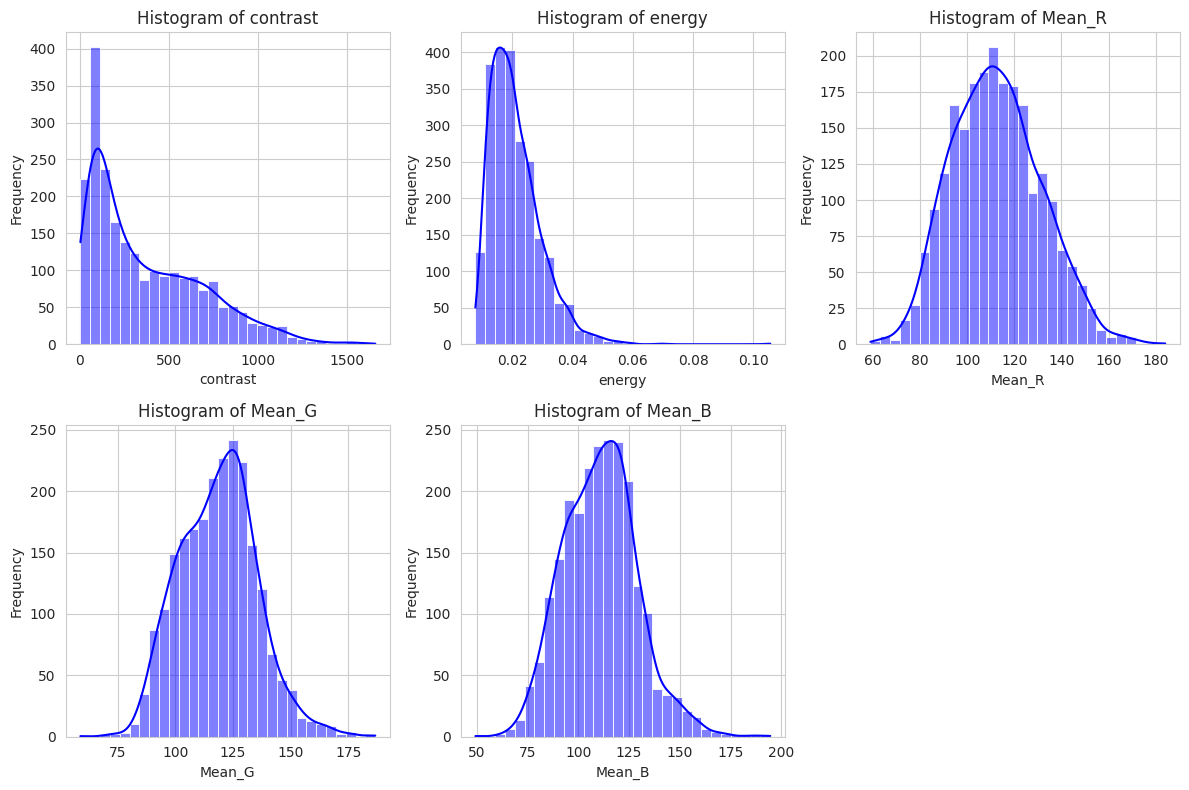

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("apple_leaf_features.csv")

# Drop non-numeric columns
df_numeric = df.drop(columns=["Class"])

# Define features for visualization
features_to_plot = ["contrast", "energy", "Mean_R", "Mean_G", "Mean_B"]

# Set plot style
sns.set_style("whitegrid")

# Create histograms for selected features
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout
    sns.histplot(df_numeric[feature], bins=30, kde=True, color="blue")
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the extracted features dataset
df = pd.read_csv("apple_leaf_features.csv")

# List of feature columns (excluding 'Class' column)
feature_columns = df.columns[:-1]

# Compute statistics
stats_summary = df[feature_columns].describe().T  # Transpose for readability
stats_summary["mode"] = df[feature_columns].mode().iloc[0]  # Compute mode

# Save to CSV (optional)
stats_summary.to_csv("apple_leaf_feature_statistics.csv")

# Display summary
print("✅ Statistical Summary Computed:")
print(stats_summary)


✅ Statistical Summary Computed:
              count        mean         std        min         25%  \
contrast     2287.0  372.402773  313.788404   3.557475  105.955270   
correlation  2287.0    0.904731    0.065217   0.556063    0.866871   
energy       2287.0    0.020982    0.008410   0.007700    0.014770   
homogeneity  2287.0    0.182469    0.082930   0.038868    0.119132   
LBP_0        2287.0    0.091053    0.031081   0.004791    0.066673   
LBP_1        2287.0    0.101536    0.012035   0.028534    0.096146   
LBP_2        2287.0    0.055280    0.004946   0.014130    0.052338   
LBP_3        2287.0    0.081286    0.023002   0.037140    0.063454   
LBP_4        2287.0    0.096003    0.037365   0.033478    0.066780   
LBP_5        2287.0    0.096849    0.034469   0.040588    0.070976   
LBP_6        2287.0    0.075116    0.013971   0.046616    0.063545   
LBP_7        2287.0    0.101890    0.008789   0.055908    0.097145   
LBP_8        2287.0    0.123548    0.024739   0.065445    

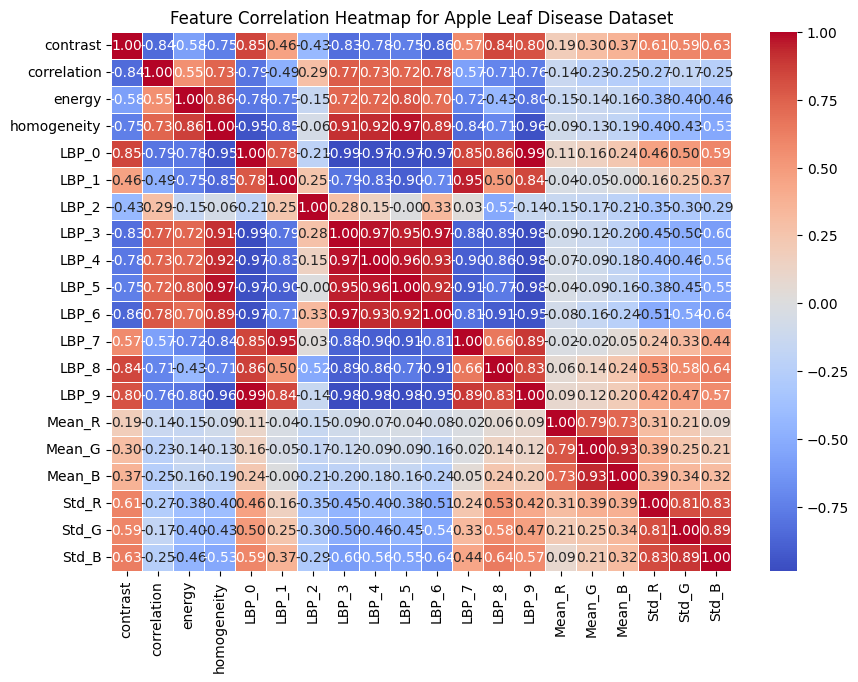

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("apple_leaf_features.csv")

# Drop the 'Class' column (non-numeric)
df_numeric = df.drop(columns=["Class"])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Set plot size
plt.figure(figsize=(10, 7))

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Feature Correlation Heatmap for Apple Leaf Disease Dataset")

# Show the plot
plt.show()


<ipython-input-37-84cd317d2b7d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


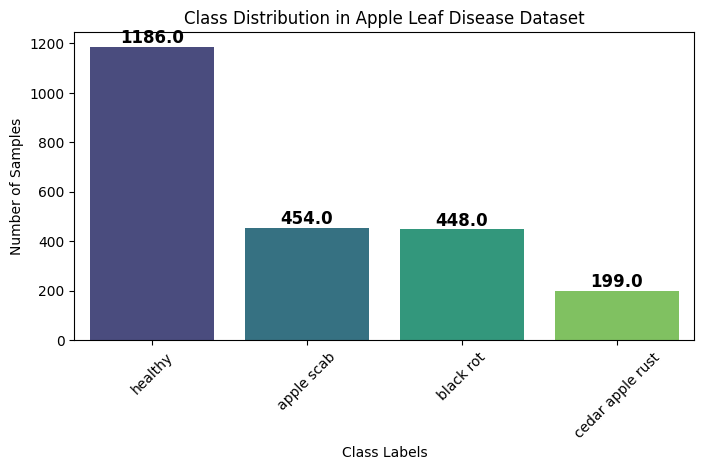

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each class
class_counts = df["Class"].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Apple Leaf Disease Dataset")
plt.xticks(rotation=45)  # Rotate labels for readability

# Show the plot
plt.show()

In [ ]:
import tensorflow as tf
